# Feature 1 - Predicting the mood of the user by analysing the posts done by the user

This feature extracts the posts made by the user and analyses the posts to categorize them as Positive, Negative or Neutral posts

In [38]:
# Author - Gowtham Musuvathi Kuamresh
# Edited on Jan 3 2021

In [39]:
import os
import nltk
import json
from nltk.corpus import stopwords
import pandas
import pandas as pd
import re
#nltk.download('stopwords')

Function to preprocess the posts by removing stop words in English

In [40]:
def remove_stopwords(words):
    new_words = ""
    word = words.split(" ")
    for i in word:
        if i not in stopwords.words('english'):
            new_words += (i) + " "
    return (new_words[:-1])

Creates dataframe of all the posts by the user along with date when posted

In [42]:
def dataset_creation(foldername, output):
    res = []
    for cur, _dirs, files in os.walk(foldername):
        for file in files:
            with open(cur + "/" + file, "r") as input:
                dat = json.load(input)
                for posts in dat:

                    date_time = pandas.to_datetime((posts["timestamp"]), unit='s')
                    date_time = pandas.to_datetime(date_time).date()
                    res.append(str(date_time))
                    try:
                        res.append(posts["data"][0]["post"])
                        # Text preprocessing by removing urls, special chars and numbers
                        text = posts["data"][0]["post"]
                        text = text.lower()
                        text = re.sub(r"[.*?\|\/:]", "", text)
                        text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text)
                        text = re.sub(r"[^a-z0-9]+", " ", text)
                        text = remove_stopwords(text)
                        res.append(text)
                    except:
                        res.append("")
                        res.append("")
                    res.append(foldername)
                    output.append(res)
                    res = []

    return output

In [50]:
os.chdir("C:/Users/Gowtham/PycharmProjects/Ethi_Facebook_Data_Analysis/facebook-sampledataset")
folders = os.listdir()

In [54]:
# Set current working directory
def main(sub_folders):
    out = []
    dataset_creation(sub_folders, out)
    column_names = ["Date", "Content", "Pre processed Content", "User name/ User category"]
    df = pd.DataFrame(out, columns=column_names)
    return df

Creates a csv file of all the text data from the posts posted by the users

In [55]:
df = main("posts")
print(df)

            Date                                            Content  \
0     2020-03-18  HELLO LOOK AT THIS PLZ (and send me critical f...   
1     2020-02-16  Hey friends, I've been asked to sit on a stage...   
2     2020-01-21  Get this man a Big White House please, I think...   
3     2019-12-12  Going to vote now.. bet you canât guess who ...   
4     2019-12-12               VOTE VOTE VOTE you have 4 MORE HOURS   
5     2019-12-12  This is my last day of propaganda ð strange...   
6     2019-12-11                      #fridgegate \n#votetactically   
7     2019-12-11  I havenât heard a single NHS employee say an...   
8     2019-12-11  ððð imagine being more afraid of scru...   
9     2019-12-10                                                      
10    2019-12-09  The fact is, saying that you wonât be sellin...   
11    2019-12-08                          Curb your enthusiasm BoJo   
12    2019-12-08                                                      
13    

# Posts analysis using TextBlob

Creating a visualization to count the number of positive, negative and neutral posts  by the user

In [56]:
import matplotlib.pyplot  as plt
from textblob import TextBlob

In [57]:
score = []
for i in df["Pre processed Content"]:
    a = (TextBlob(str(i)))
    if (a.sentiment.polarity) < 0:
        score.append(-1)
    if (a.sentiment.polarity) == 0:
        score.append(0)
    if (a.sentiment.polarity) > 0:
        score.append(1)
df['Score'] = score

Categorizing the posts into Positive, Negative and Neutral based on Sentiment polarity using the Text Blob library

In [58]:
# -1 is coded as Negative posts
negative = df.loc[df["Score"] == -1]

In [59]:
# 1 is coded as Positive posts
positive = df.loc[df["Score"] == 1]

In [60]:
# 0 is coded as Neutral posts
neutral = df.loc[df["Score"] == 0]

The negative posts are grouped together by the Date column

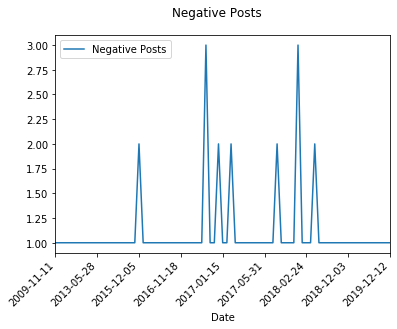

In [65]:
neg_df = negative.groupby(negative["Date"])["Score"].agg("count").to_frame("Negative Posts").reset_index()
neg_df.plot(x='Date', y='Negative Posts', kind='line')
plt.suptitle("Negative Posts")
plt.xticks(rotation=45, ha='right')
plt.show()

The neutral posts are grouped by the Date column

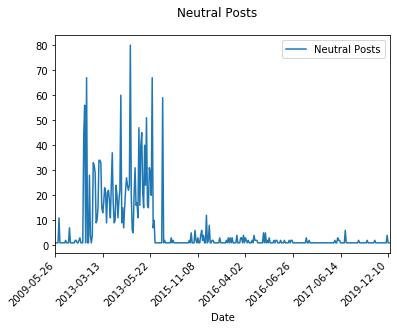

In [62]:
neu_df = neutral.groupby(neutral["Date"])["Score"].agg("count").to_frame("Neutral Posts").reset_index()
neu_df.plot(x="Date", y="Neutral Posts", kind="line")
plt.xticks(rotation=45, ha='right')
plt.suptitle("Neutral Posts")
plt.show()

The positive posts are grouped by the Date column

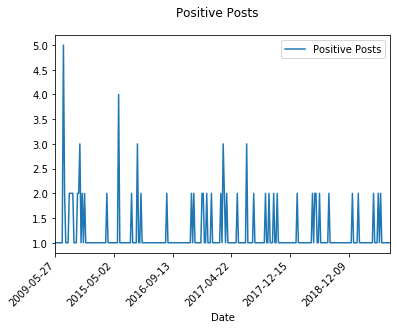

In [63]:
pos_df = positive.groupby(positive["Date"])["Score"].agg("count").to_frame("Positive Posts").reset_index()
pos_df.plot(x="Date", y="Positive Posts", kind="line")
plt.suptitle("Positive Posts")
plt.xticks(rotation=45, ha='right')
plt.show()

Creating an excel file to do data visualization in Tableau

In [64]:
final_df = pd.merge(pos_df, neg_df, how="outer", on="Date")

final = pd.merge(final_df, neu_df, how="outer", on="Date")

final = final.fillna(0)
final[["Positive Posts", "Negative Posts", "Neutral Posts"]] = final[
    ["Positive Posts", "Negative Posts", "Neutral Posts"]].astype(int)
final.to_csv("Posts_Sentiment_Analysis.csv", encoding='utf-8', index=False)
print(final)

           Date  Positive Posts  Negative Posts  Neutral Posts
0    2009-05-27               1               0              1
1    2010-05-22               1               0              0
2    2010-07-14               1               0              0
3    2011-01-02               1               0              0
4    2011-03-12               1               0              0
5    2011-06-25               1               0              0
6    2011-07-02               1               0              0
7    2011-07-09               5               0              0
8    2011-07-11               2               0              0
9    2011-07-13               1               0              0
10   2011-08-19               1               0              0
11   2011-08-23               1               0              1
12   2011-08-26               2               0              0
13   2011-08-31               2               0              0
14   2011-09-05               2               0        